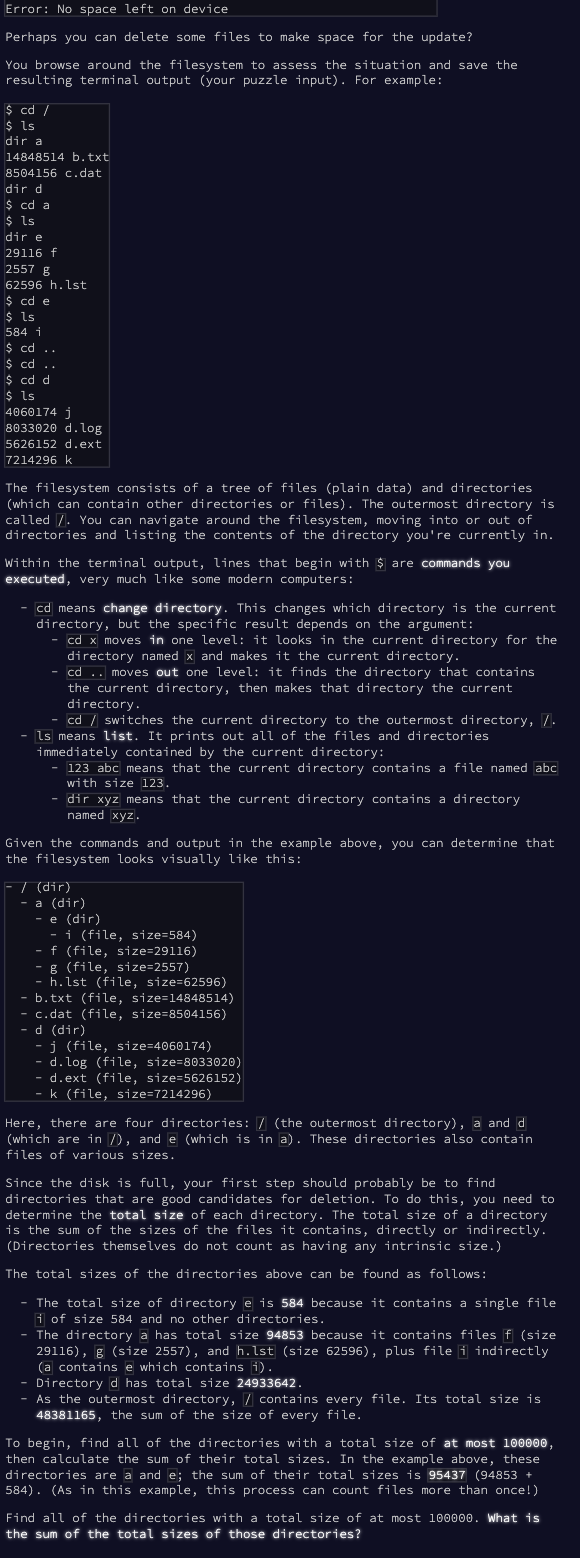

In [1]:
from IPython import display
display.Image("day7part1instructions.jpeg")

<b> TESTING ON EXAMPLE DIRECTORIES </b>

In [2]:
# building test terminal list (matching example from instructions)

test_list_a = ['$ cd /','$ ls','dir a','14848514 b.txt','8504156 c.dat']
test_list_b = ['dir d','$ cd a','$ ls','dir e','29116 f','2557 g','62596 h.lst','$ cd e','$ ls']
test_list_c =['584 i','$ cd ..','$ cd ..','$ cd d','$ ls','4060174 j','8033020 d.log','5626152 d.ext','7214296 k']

test_list = test_list_a + test_list_b + test_list_c
test_list

['$ cd /',
 '$ ls',
 'dir a',
 '14848514 b.txt',
 '8504156 c.dat',
 'dir d',
 '$ cd a',
 '$ ls',
 'dir e',
 '29116 f',
 '2557 g',
 '62596 h.lst',
 '$ cd e',
 '$ ls',
 '584 i',
 '$ cd ..',
 '$ cd ..',
 '$ cd d',
 '$ ls',
 '4060174 j',
 '8033020 d.log',
 '5626152 d.ext',
 '7214296 k']

In [3]:
# drop '$ ls' command, not needed for building the directory tree

test_list = [line for line in test_list if line != '$ ls']
test_list

['$ cd /',
 'dir a',
 '14848514 b.txt',
 '8504156 c.dat',
 'dir d',
 '$ cd a',
 'dir e',
 '29116 f',
 '2557 g',
 '62596 h.lst',
 '$ cd e',
 '584 i',
 '$ cd ..',
 '$ cd ..',
 '$ cd d',
 '4060174 j',
 '8033020 d.log',
 '5626152 d.ext',
 '7214296 k']

In [4]:
# classes used to build the tree

class Node:
     
    def __init__(self, name, filesizes = 0, parent = None):
         
        self.name = name
        self.parent = parent
        self.filesizes = filesizes
        self.children = []
       
    
class Tree:
    
    def __init__(self):
        self.root = None
        self.curr = None
    
    def set_root_node(self, name, filesizes = 0):
        self.root = Node(name, filesizes, parent = None)
        self.curr = self.root
    
    def add_node(self, name, filesizes = 0):
        self.curr.children.append(Node(name, filesizes, parent = self.curr))
        
    def move_down(self,name):
        for node in self.curr.children:
            if node.name == name:
                self.curr = node
                break
    
    def move_up(self):
        self.curr = self.curr.parent    

In [5]:
# setting outermost directory as root of tree

t = Tree()
t.set_root_node('/')

In [6]:
# function to add file sizes from child directories to parent directories

def climb_and_add(size):
    if t.curr.parent != None:
        t.curr = t.curr.parent
        t.curr.filesizes += size
        climb_and_add(size)

In [7]:
# iterating through the terminal list, adding leaves to tree 

for line in test_list[1:]:
    if 'dir ' in line:
        t.add_node(line)
    elif line == '$ cd ..':
        t.move_up()
    elif '$ cd 'in line:
        t.move_down('dir ' + line[5:])
    else:
        size = line.split(' ')
        size = int(size[0])
        t.curr.filesizes += size
        save_curr = t.curr
        climb_and_add(size)
        t.curr = save_curr

In [8]:
# function to transverse tree and capture size of each directory 

list_of_dir_sizes = []

def transverse(node):
    list_of_dir_sizes.append(node.filesizes)
    while len(node.children) != 0:
        check = node.children.pop()
        transverse(check) 

In [9]:
# transverse tree starting from the root, capturing directory sizes

transverse(t.root)
list_of_dir_sizes

[48381165, 24933642, 94853, 584]

In [10]:
# pulling out directories that fit max size criteria

size_limited_list = [size for size in list_of_dir_sizes if size <= 100000]
size_limited_list

[94853, 584]

In [11]:
# adding them up to find total size

total = 0
for size in size_limited_list:
    total += size

total

95437

<b>SOLVING ON ACTUAL PUZZLE INPUT</b>

In [12]:
with open('day7input.txt') as day7input:
    raw_input = day7input.read()

raw_input[:1000]

'$ cd /\n$ ls\ndir gqlg\ndir hchrwstr\ndir lswlpt\n189381 mzsnhlf\ndir plmdrbn\ndir rjwmjd\ndir stqq\n93174 zfn\ndir zjhqnlrr\ndir zssdlnc\n$ cd gqlg\n$ ls\n187654 cfrdsjf\n100589 ntvmgbw\n46922 zcmfcjhf.tzw\n$ cd ..\n$ cd hchrwstr\n$ ls\n227766 cljjlcp.pjh\n102770 rdbrcf.pjl\n9887 rfnjn.lqn\ndir rzsrp\ndir shlhgj\ndir slwwgc\n$ cd rzsrp\n$ ls\ndir rzsrp\n$ cd rzsrp\n$ ls\ndir dvzvmsjz\n208001 tnflwcsn\ndir zfn\n$ cd dvzvmsjz\n$ ls\n149823 hvgbhm.zsc\n$ cd ..\n$ cd zfn\n$ ls\n292424 gqlg.tzc\n$ cd ..\n$ cd ..\n$ cd ..\n$ cd shlhgj\n$ ls\n61753 fzpzwjdt.jvl\n195204 jjhc.tzr\n288094 zcmfcjhf.tzw\n$ cd ..\n$ cd slwwgc\n$ ls\n118185 jjhc.tzr\n291916 jwnw.wqv\n116377 ptlz\n300849 pzjpw.hwg\n28679 zfn.grz\n$ cd ..\n$ cd ..\n$ cd lswlpt\n$ ls\n124160 dbnlt.rqz\n154412 sfd\n$ cd ..\n$ cd plmdrbn\n$ ls\ndir fmzjhrq\n224144 rlc.qns\n2985 zcmfcjhf.tzw\n$ cd fmzjhrq\n$ ls\n9749 lqj.szc\ndir rrjjsvm\n$ cd rrjjsvm\n$ ls\n66652 zcmfcjhf.tzw\n$ cd ..\n$ cd ..\n$ cd ..\n$ cd rjwmjd\n$ ls\ndir twcrf\n12

In [13]:
input_list = raw_input.splitlines()

input_list[:20]

['$ cd /',
 '$ ls',
 'dir gqlg',
 'dir hchrwstr',
 'dir lswlpt',
 '189381 mzsnhlf',
 'dir plmdrbn',
 'dir rjwmjd',
 'dir stqq',
 '93174 zfn',
 'dir zjhqnlrr',
 'dir zssdlnc',
 '$ cd gqlg',
 '$ ls',
 '187654 cfrdsjf',
 '100589 ntvmgbw',
 '46922 zcmfcjhf.tzw',
 '$ cd ..',
 '$ cd hchrwstr',
 '$ ls']

In [14]:
input_list = [line for line in input_list if line != '$ ls']
input_list[:20]

['$ cd /',
 'dir gqlg',
 'dir hchrwstr',
 'dir lswlpt',
 '189381 mzsnhlf',
 'dir plmdrbn',
 'dir rjwmjd',
 'dir stqq',
 '93174 zfn',
 'dir zjhqnlrr',
 'dir zssdlnc',
 '$ cd gqlg',
 '187654 cfrdsjf',
 '100589 ntvmgbw',
 '46922 zcmfcjhf.tzw',
 '$ cd ..',
 '$ cd hchrwstr',
 '227766 cljjlcp.pjh',
 '102770 rdbrcf.pjl',
 '9887 rfnjn.lqn']

In [15]:
t = Tree()
t.set_root_node('/')

In [16]:
for line in input_list[1:]:
    if 'dir ' in line:
        t.add_node(line)
    elif line == '$ cd ..':
        t.move_up()
    elif '$ cd 'in line:
        t.move_down('dir ' + line[5:])
    else:
        size = line.split(' ')
        size = int(size[0])
        t.curr.filesizes += size
        save_curr = t.curr
        climb_and_add(size)
        t.curr = save_curr

In [17]:
list_of_dir_sizes = []
transverse(t.root)
list_of_dir_sizes[:20]

[41412830,
 754545,
 486260,
 99924,
 99924,
 179734,
 102281,
 33688513,
 105177,
 105177,
 7083801,
 85701,
 4735392,
 3116137,
 229576,
 655093,
 73040,
 183087,
 425741,
 1000791]

In [18]:
size_limit_list = [size for size in list_of_dir_sizes if size <= 100000]
size_limit_list

[99924,
 99924,
 85701,
 73040,
 27818,
 8466,
 85885,
 51482,
 51482,
 38834,
 94749,
 28523,
 59390,
 74041,
 45124,
 68979,
 64761,
 64761,
 48767,
 77162,
 37925,
 41304,
 21860,
 41865,
 22926,
 97079,
 94821,
 76401,
 66652]

In [19]:
total = 0
for size in size_limit_list:
    total += size

total

1749646

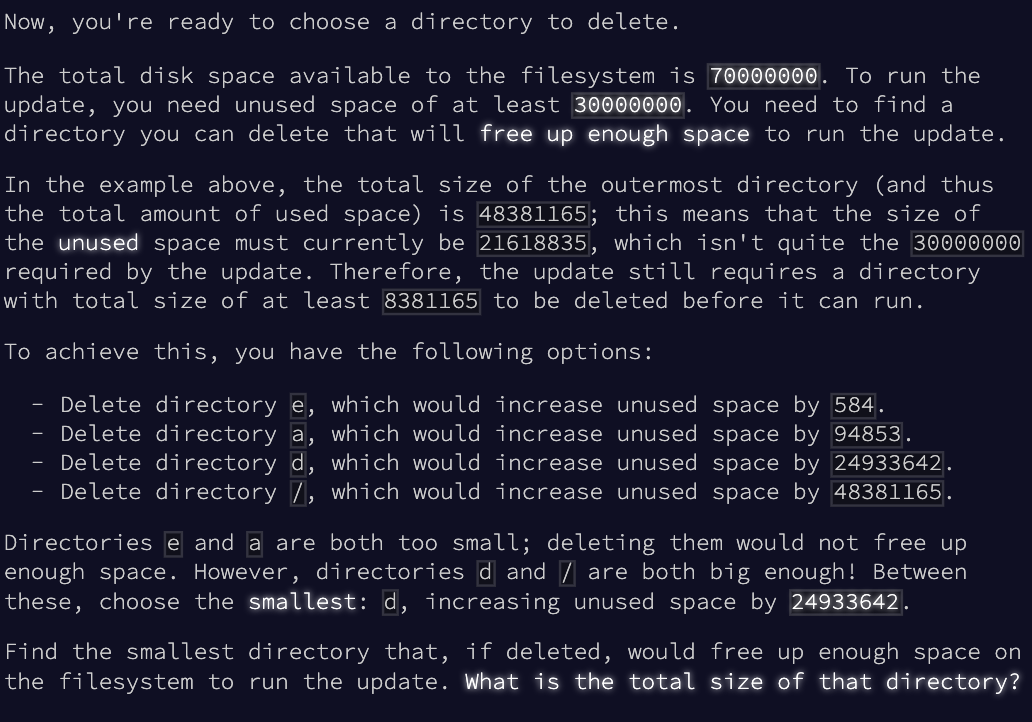

In [20]:
display.Image("day7part2instructions.jpeg")

In [21]:
unused_space = 70000000 - list_of_dir_sizes[0]
unused_space

28587170

In [22]:
extra_space_needed = 30000000 - unused_space
extra_space_needed

1412830

In [24]:
big_enough_dirs = [dir for dir in list_of_dir_sizes if dir >= 1412830]
big_enough_dirs

[41412830,
 33688513,
 7083801,
 4735392,
 3116137,
 25120519,
 10926518,
 3106082,
 2165974,
 2089374,
 2437439,
 10618286,
 7603943,
 2568421,
 1852329,
 1498966,
 1840355,
 2449536,
 2391728]

In [25]:
min(big_enough_dirs)

1498966